## INTRODUCTION

In this notebook, we will use SVM (Support Vector Machines) to build and train a model using Universal Bank records, and classify the customer is eligible to take Credit Card or not.

2) What is SVM its goal

3) Types Of SVM/ kernel functions 

3) Optimal Hyperplane

4) Data Preprocessing

4) Data cleaning

5) Data Visualisation (Heatmaps, Scatterplots)

6) Scaling the data( standardization)

7) Implementation of SVM algorithms

8) Training and testing the given data

9) Applying the SVM algorithm model

9) confusion matrix

10) Classification  report

11) Applying the SVM model using the kernel functions 

12) Linear kernel function

13) Gaussian RBF Kernel Function

14) polinomial kernel function

15) Sigmoid kernel function 


## What is mean by SVM in Machine learning ?

A support vector machine (SVM) is defined as a machine learning algorithm that uses supervised learning models to solve complex classification, regression, and outlier detection problems by performing optimal data transformations that determine boundaries between data points based on predefined classes, labels,

# What is primary goal of SVM in machine learning model ?


The goal of SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future

SVM chooses the extreme points/vectors that helps in creating the hyperplane 
these extreme classes are called Support vectors and the algorithm is 
termed as Support vector machine 

A hyperplane is a decision boundary that differentiates the two classes in SVM. A data point falling on either side of the hyperplane can be attributed to different classes. The dimension of the hyperplane depends on the number of input features in the dataset

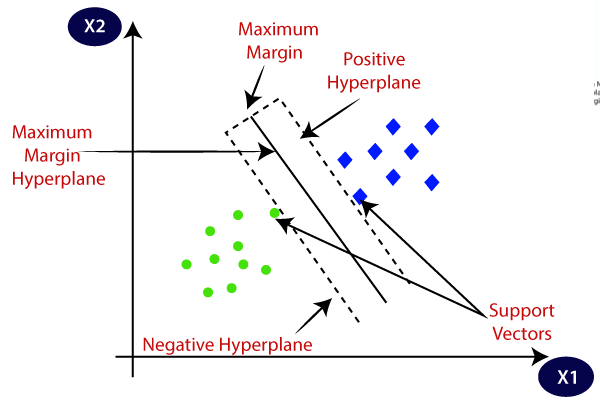

# Types of SVM in machine learning
#  SVM have two types

1)Linear SVM - Linear SVM is used for linearly seperable data means if a dataset can be classified into two classes by using a straight single line then such data is known as linearly seperable data

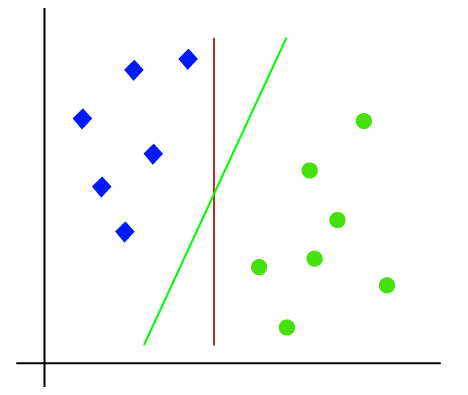

2) Non Linear SVM- Non linear SVM is uesd for non linearly seperated data which means data could not be classified easily by using the straight line then such data is known as non linear data  and classifier is called as Non-Linear classifier

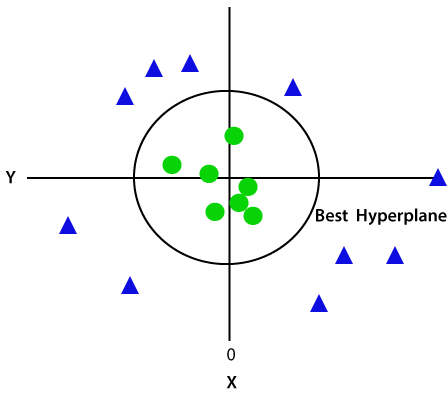

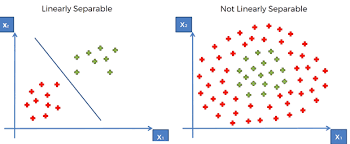

# 3)Optimal Hyperplane


Optimal Hyperplane is the decision boundary that maximizes the distance of the margin between the class bounding hyperplanes (also called supporting hyperplanes).

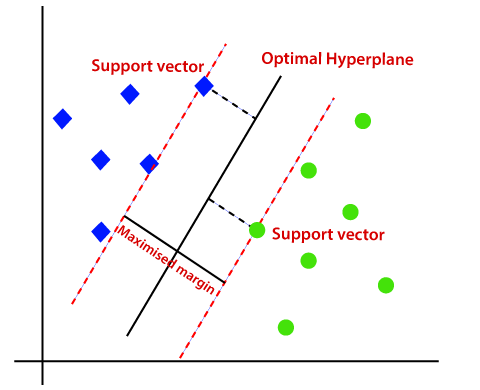

# Data Preprocessing

Libraries used for the implementation are

1) Numpy - NumPy can be used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.

2) pandas- Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data

3) Matplotlib - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible

4)Seaborn- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("C:/Users/hp/Downloads/archive (19)/UniversalBank.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# To print the first five rows

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# To check the null values in the data

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Dropping ID and Zip code columns from the data set

In [6]:
df=df.drop(["ID","ZIP Code"],axis =1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# Data Visualisation

Heatmap - plotting the heatmap to see the correlation between the features

A heatmap, to be precise, is a technique of data visualization that makes use of colour in order to exhibit how a value of interest varies on the basis of the values of the two other variables.

<AxesSubplot:title={'center':'Heatmap showing Correlation between all the features,fontsize=30'}>

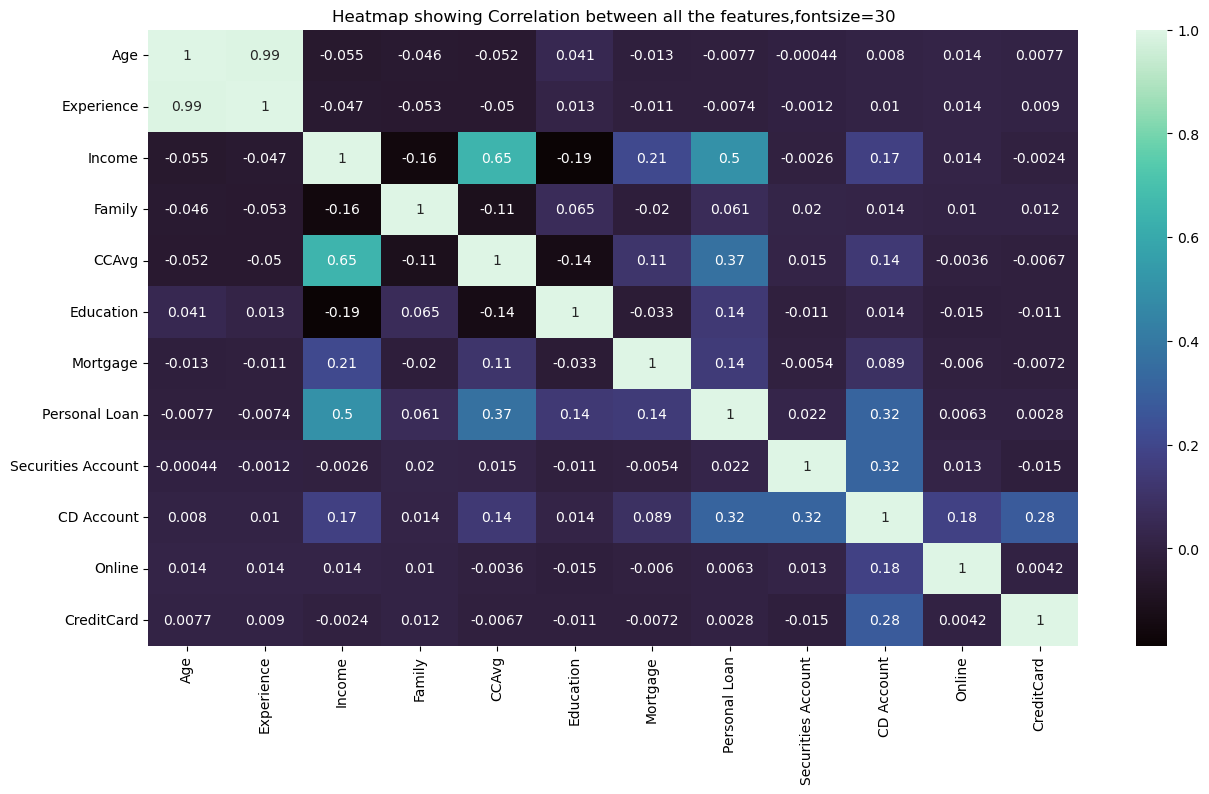

In [7]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features,fontsize=30")
sns.heatmap(df.corr(),annot=True, cmap='mako')


In [8]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

Seprating the class 0 and class 1 creditCard data

In [9]:
zero_class = df[df.CreditCard==0]
zero_class.shape

(3530, 12)

In [10]:
one_class= df[df.CreditCard==1]
one_class.shape

(1470, 12)

Scatter Plot - Plotted the Scatter plot using the two features at a time "Age" and "Experience" to visualize the distribution of the data 

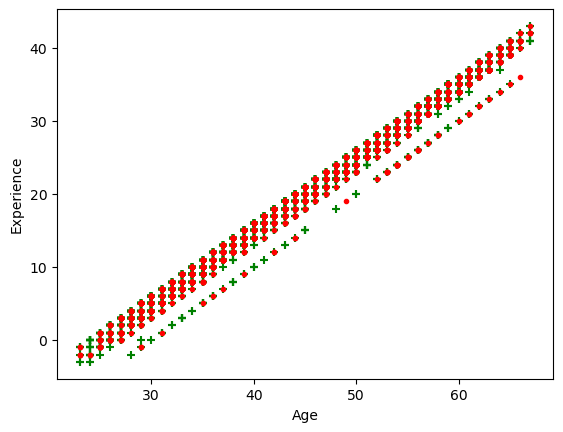

In [11]:
plt.xlabel('Age')
plt.ylabel('Experience')
plt.scatter(zero_class['Age'],zero_class['Experience'], color = 'green', marker='+')
plt.scatter(one_class['Age'],one_class['Experience'], color = 'red', marker='.')

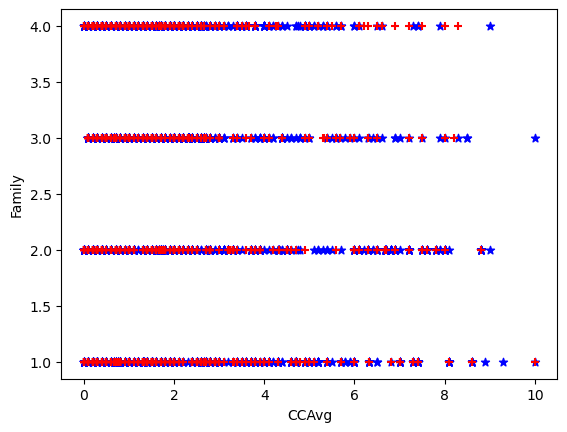

In [12]:
# CCAvg vs Family scatter plot
plt.xlabel('CCAvg')
plt.ylabel('Family')
plt.scatter(zero_class['CCAvg'],zero_class['Family'], color = 'blue', marker='*')
plt.scatter(one_class['CCAvg'], one_class['Family'], color = 'red', marker='+')

# Scaling the data 

Here we can see that our data is not in the same range. So, We need to scale the data in same range for that we will use the standardization technique

### StandardScaler follows Standard Normal Distribution(SND). Therefore,it makes mean = 0 and scales the data to unit variance

The standard normal distribution, also called the z-distribution, is a special normal distribution where the mean is 0 and the standard deviation is 1

In [13]:
# Scaling the data using the standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df.drop('CreditCard',axis=1)).transform(df.drop('CreditCard',axis=1))
df_scaled =pd.DataFrame(scaled, columns=df.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


## Splitting the columns in to dependent variable (x)and independent variable(y)

In [14]:
x = df_scaled
y = df['CreditCard']

# Implementation of SVM

 We will implement the SVM algorithm using Python. Here we will use the Universal Bank Dataset to understand the Support Vector Machine Algorithm.

In [15]:
# Split data in to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.749


<AxesSubplot:>

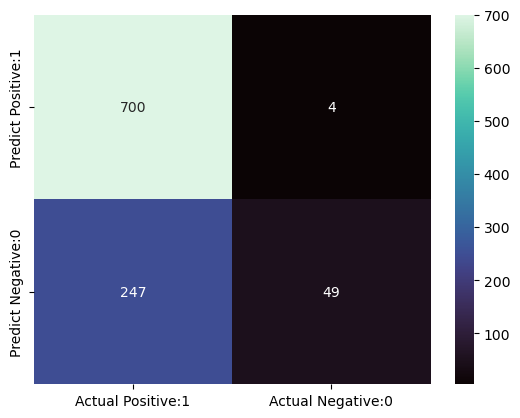

In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [18]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



# SVM Kernel function


A kernel function in SVM is used to solve problems.With the help of kernel we can got to higher dimensions and perform smooth calculations.We can go to an infinite number of dimensions using the kernel.kernel plays a vital role in classification and is used to analyze some patterns in the given dataset.they are very helpful in solving a non linear problem by using a linear classifier
        
Sometimes, we cannot have a hyperplane for certain problems. This problem arises when we go up to higher dimensions and try to form a hyperplane. We have various svm kernel functions to convert the non-linear data to linear. In this notebook, we listed 8 such popular svm kernel functions

# Now we will see how to implement this functions 

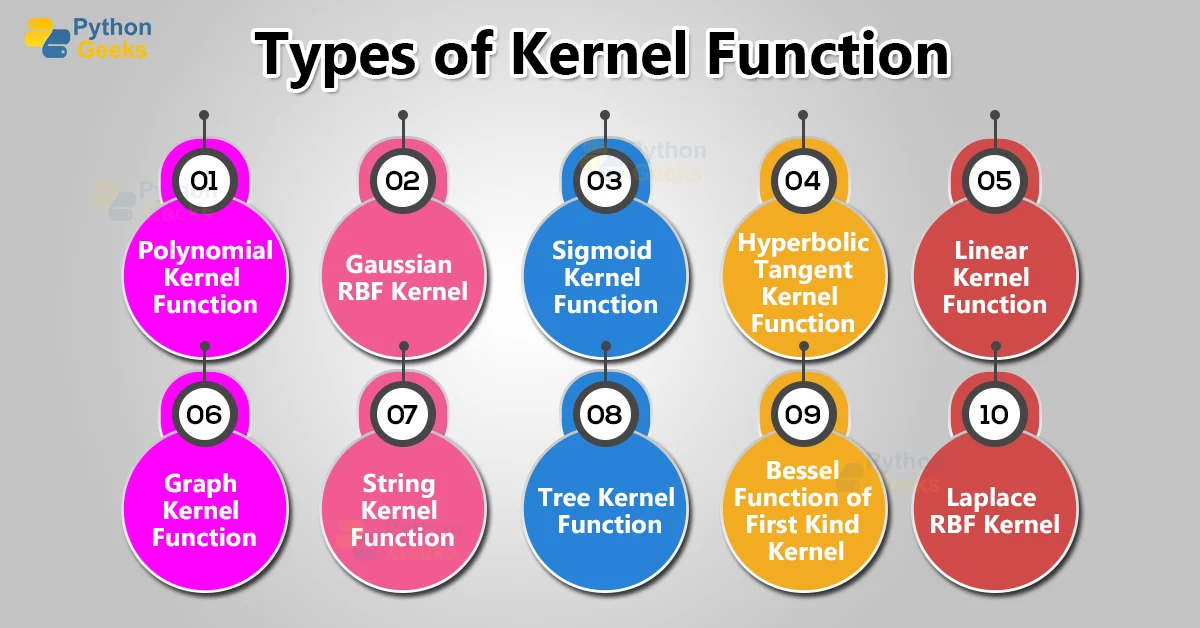



# Linear kernel- It is the most basic type of the kernel that is one dimensional in nature it proves to be the best function when there are lots of features 
Linear kernel functions are faster than other functions



Linear Kernel Formula¶
F(x, xj) = sum( x.xj)

Here, x, xj represents the data we’re trying to classif

# Apply SVM model suing the linear kernel function


In [19]:
linear_classifier=SVC(kernel="linear").fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print ('Model accuracy with linear kernel: {0:0.3f}'.format(accuracy_score(y_test, y_pred)))


Model accuracy with linear kernel: 0.747


## A confusion matrix - presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

<AxesSubplot:>

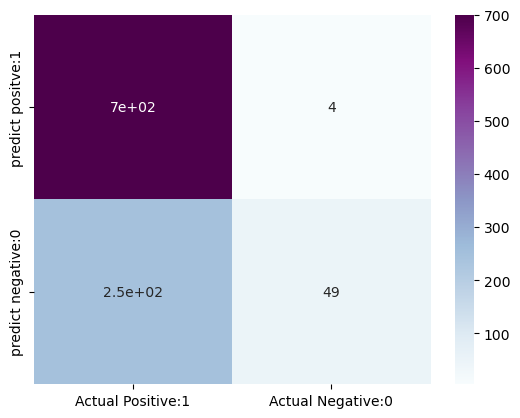

In [53]:
# Confusion matrix 
cm = confusion_matrix (y_test, y_pred)
cm_matrix= pd.DataFrame(data=cm, columns=['Actual Positive:1','Actual Negative:0'],
                       
                       index=['predict positve:1','predict negative:0'])
sns.heatmap(cm_matrix,annot=True, cmap='BuPu')

<AxesSubplot:>

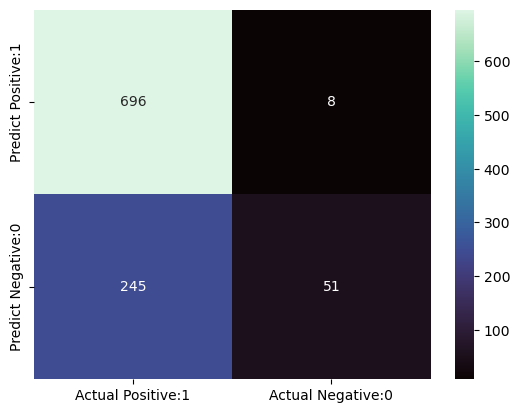

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [22]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.86      0.17      0.29       296

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.68      1000



# Classification Report

# What is Precision  ?

Precision in classification is the ratio between the True positive and all the positive

Precision also gives the measure of the relevant data points

# What is recall

Recall is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset

# What is F1 score

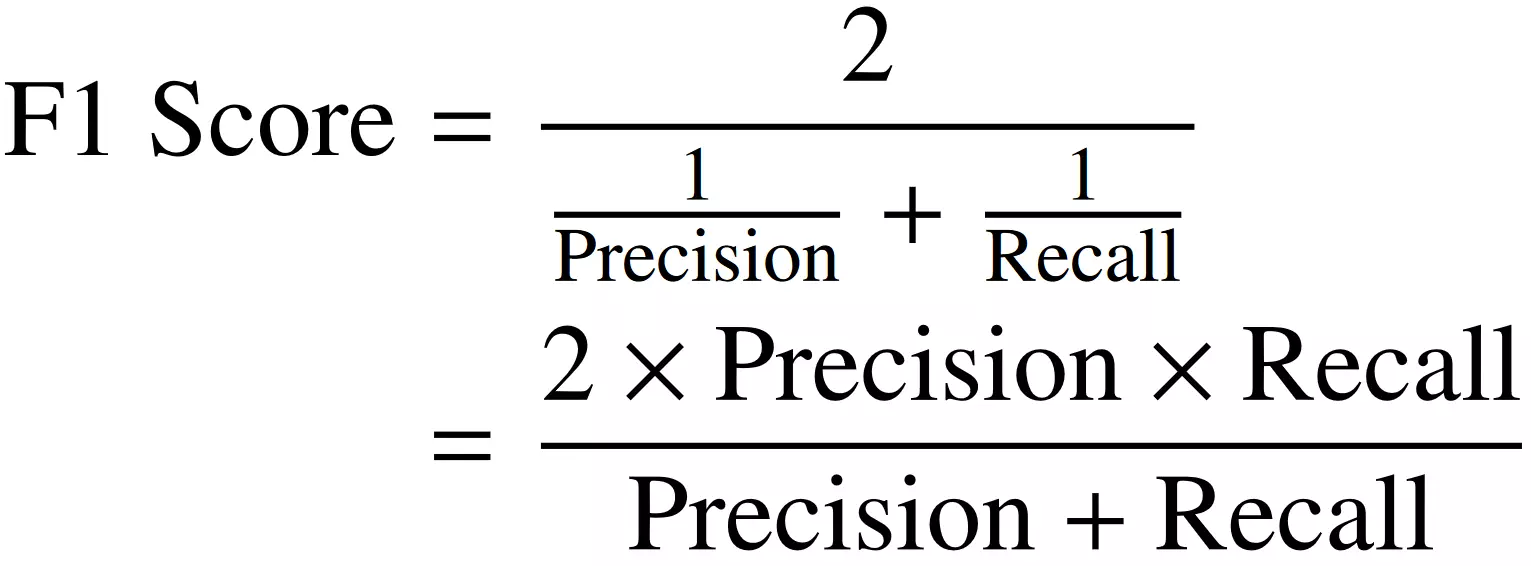

The F1 score or F-measure is described as the harmonic mean of the precision and recall of a classification model

# What is support

Support is the number of actual occurrences of the class in the specified dataset.

# Polynomial Kernel

It is a more generalized representation of the linear kernel. It is not as preferred as other kernel functions as it is less efficient and accurate.

In machine learning, the polynomial kernel is a kernel function commonly used with support vector machines (SVMs) and other kernelized models, that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models

Polynomial Kernel Formula¶
F(x, xj) = (x.xj+1)^d

Here ‘.’ shows the dot product of both the values, and d denotes the degree.

F(x, xj) representing the decision boundary to separate the given classes.

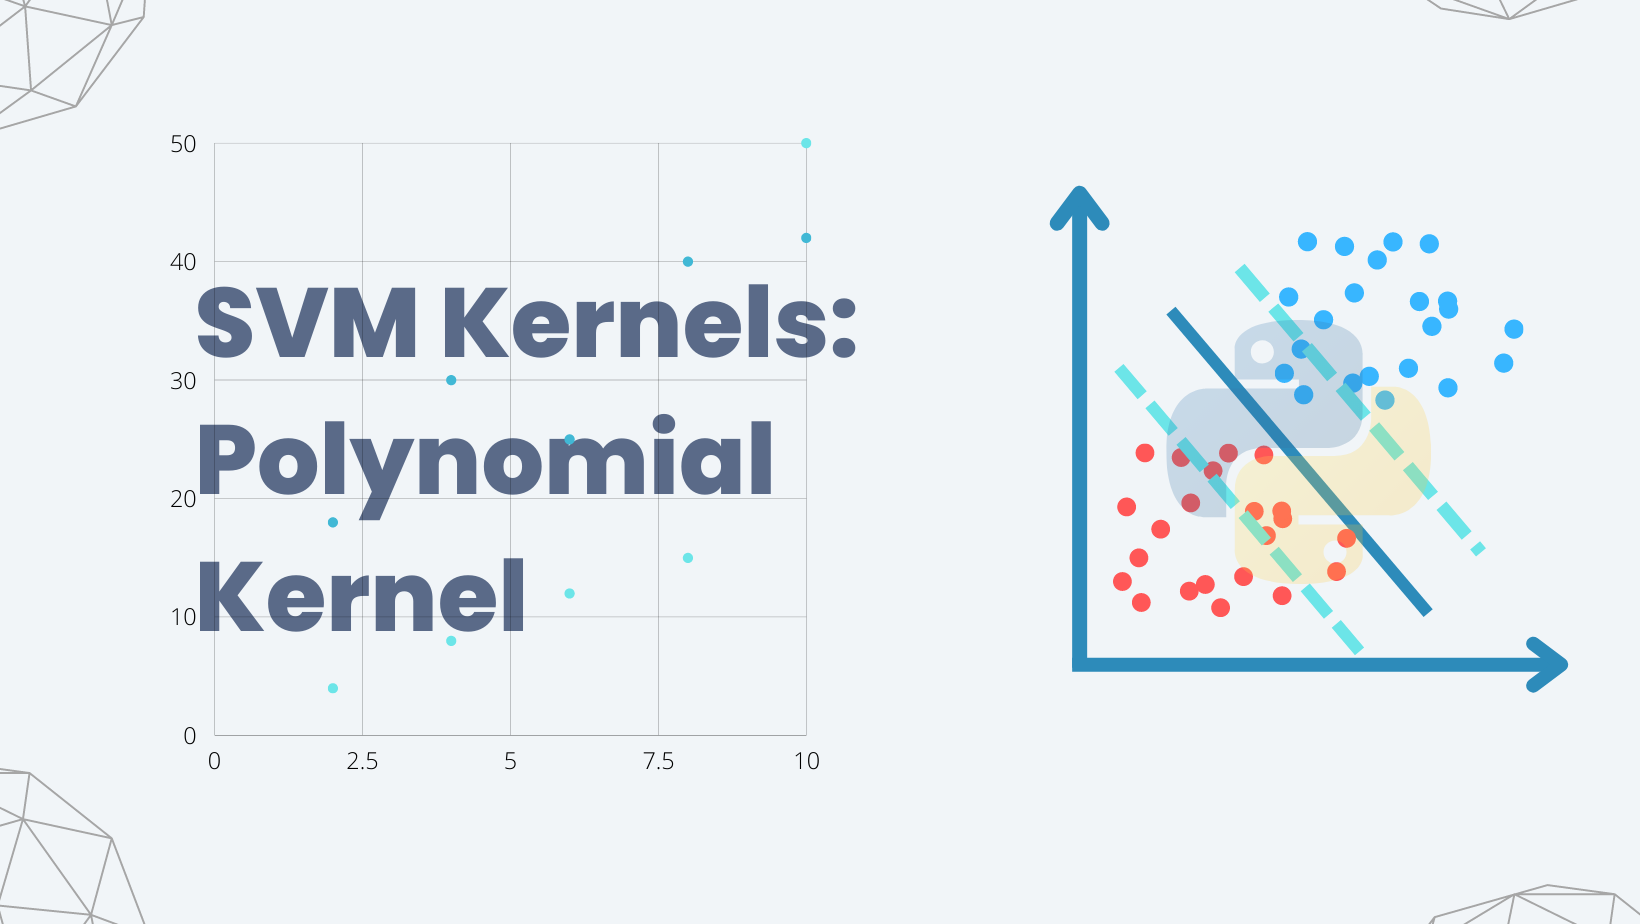

In [27]:
 # Apply SVM model using the Polynomial kernel function
Poly_svc=SVC(kernel='poly', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}' . format(accuracy_score(y_test,y_pred)))


Model accuracy with rbf kernel : 0.749


# CONFUSION MATRIX

In confusion matrix notation, fmt='d' refers to the format specifier used to format the values in the confusion matrix as integers.

Here's what each part of fmt='d' means:

fmt: This parameter specifies the format of the values in the confusion matrix.
'd': This format specifier indicates that the values should be formatted as decimal integers

<AxesSubplot:>

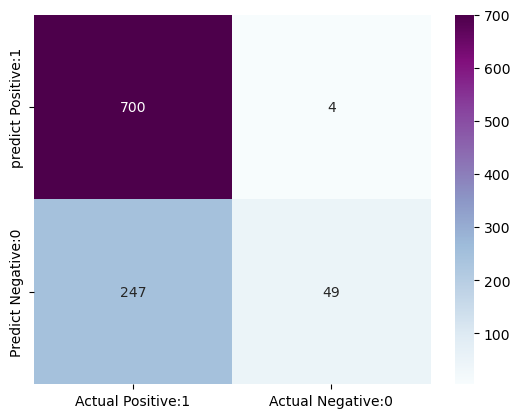

In [38]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1','Actual Negative:0'],
                        index=['predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True,fmt='d', cmap='BuPu')

In [40]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



# Sigmoid Kernel

It is most preferred for neural networks. This kernel function is similar to a two-layer perceptron model of neural network, which works as an activation function

where the kernel coefficient ( gamma ) controls the influence of each individual training sample on the decision boundary and is the bias term ( coef0 ) that shifts the data up or down. In the sigmoid kernel, the similarity between two data points is computed using the hyperbolic tangent function ( )

Sigmoid Kernel Formula
F(x,xj)=tanh(αxay+c)

In [45]:
# Apply SVM model using Sigmoid Kernel function
Poly_svc=SVC(kernel='sigmoid', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.629


<AxesSubplot:>

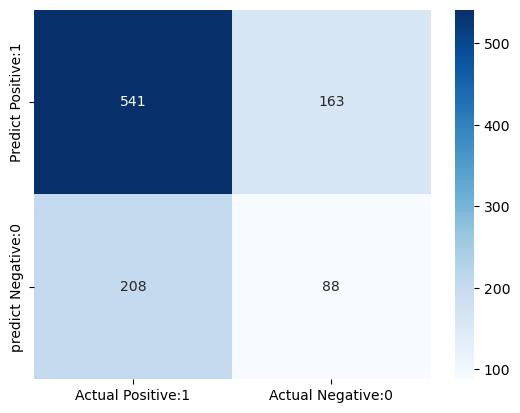

In [47]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1','predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d' , cmap='Blues')

In [48]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       704
           1       0.35      0.30      0.32       296

    accuracy                           0.63      1000
   macro avg       0.54      0.53      0.53      1000
weighted avg       0.61      0.63      0.62      1000



# Gaussian RBF Kernel

It is one of the most preferred and used kernel functions in svm. It is usually chosen for non-linear data. It helps to make proper separation when there is no prior knowledge of data.

Gaussian Radial Basis Formula¶
F(x, xj) = exp(-gamma * ||x - xj||^2)

In [49]:
# Apply SVM model using Gaussian RBF kernel function 
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.749


<AxesSubplot:>

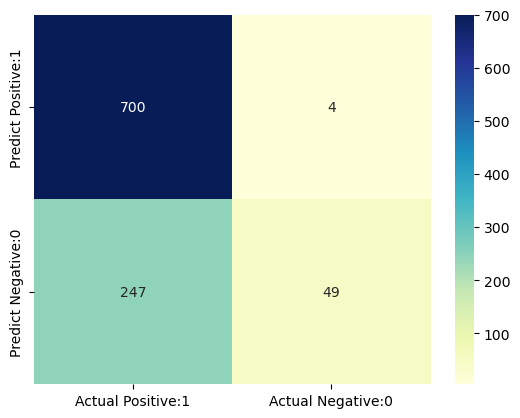

In [52]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [51]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



### Among all these above kernels Gaussian RBF kernel is giving more accurate Prediction. The model accuracy with Gaussian RBF kernel is 0.749

